In [292]:
%matplotlib inline
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt  

In [293]:
import numpy as np
import pandas as pd
import datetime as dt 

#  Reflect Tables into SQLAlchemy ORM

In [294]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [310]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [311]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
#Base.prepare(autoload_with=engine)
Base.prepare(engine, reflect=True)

In [312]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [313]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [314]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [315]:
engine.execute('SELECT * FROM Station ORDER BY ID DESC').fetchall()

[(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)]

In [316]:
engine.execute('SELECT * FROM Measurement ORDER BY ID DESC LIMIT 1').fetchall()

[(19550, 'USC00516128', '2017-08-23', 0.45, 76.0)]

In [39]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The most recent data point in the database is {most_recent_date}")

The most recent data point in the database is ('2017-08-23',)


In [327]:
# Calculate the date one year from the last date in data set.
prv_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(f"The date one year from the last date in the dataset is {prv_year}")

The date one year from the last date in the dataset is 2016-08-23


In [325]:
# Perform a query to retrieve the data and precipitation scores
data_precip = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= prv_year).order_by(Measurement.date).all()

#save as dataframe and set index to date
#set column as index
data_precip_df = pd.DataFrame(data_precip).set_index('date')
data_precip_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


<IPython.core.display.Javascript object>


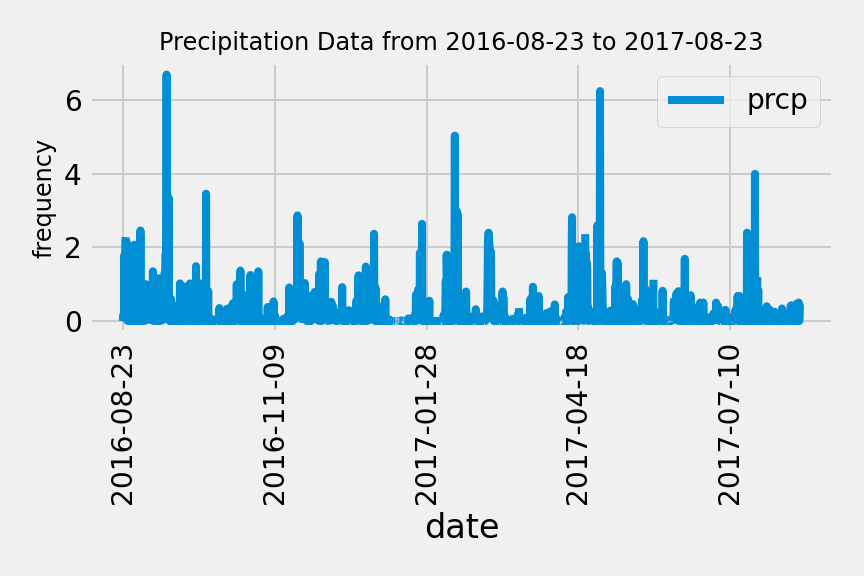

In [326]:
# Use Pandas Plotting with Matplotlib to plot the data

ax = data_precip_df.plot()
ax.set_title("Precipitation Data from 2016-08-23 to 2017-08-23", fontsize=12)
ax.set_ylabel('frequency', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [158]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stat = data_prcp_df.describe()
summary_stat

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [193]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Measurement).group_by(Measurement.station).count()
print(f"The total number of stations in the dataset is {total_stations}")

The total number of stations in the dataset is 9


In [269]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
print(f"The most active station is {most_active_station}")

The most active station is ('USC00519281', 2772)


In [200]:
# Using the most active station id from the previous query, 
#calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [257]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prv_year).all()
df= pd.DataFrame(results)
df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


<IPython.core.display.Javascript object>


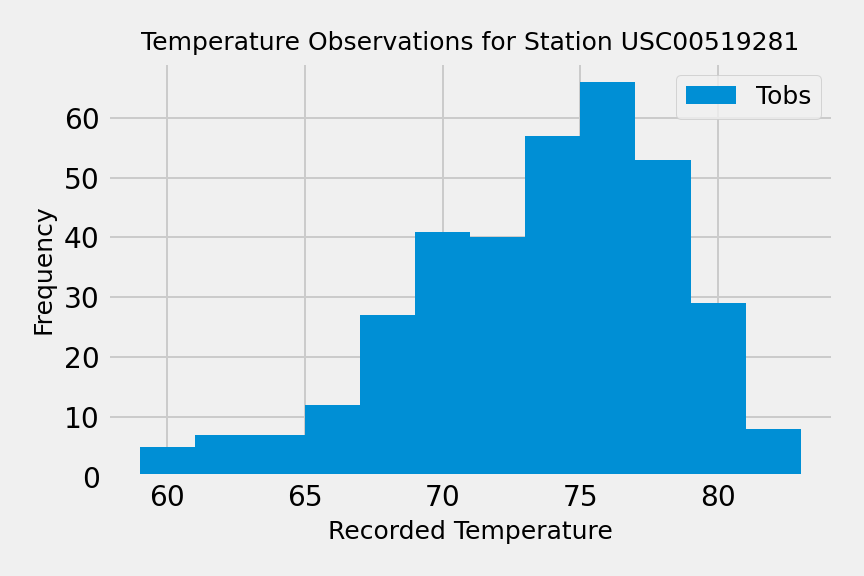

In [283]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df.plot.hist(bins=12)
plt.title("Temperature Observations for Station USC00519281" , fontsize=12.5)
plt.xlabel("Recorded Temperature", fontsize=12.5)
plt.ylabel("Frequency", fontsize=12.5)
plt.legend(["Tobs"], fontsize=12.5)
plt.tight_layout()
plt.show()

In [229]:
# Closing Session
session.close()